In [3]:
# Aufgabe: Trainieren Sie einen Klassifikator, der optimal eine Brustgewebezelle als gutartig bzw. bösartig erkennen soll.

# Eingangsdaten: training_data.csv

# Abzugeben sind zwei Skripte Funktionen:
# trainClassifier (Trainiert mithilfe von training_data.csv einen Klassifikator)
# predictDiagnosis (Klassifiziert Eingangsdaten, die das gleiche Format wie training_data.csv besitzen)

# Erforderliche Doku: Begründung der Auswahl des Klassifikators und geeignete Evaluation.

# #---------------------------------------------

# Data Set Information:

# Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.


# Attribute Information:

# 1 ID number 
# 2 Diagnosis (M  malignant, B  benign) 
# 3-32

# Ten real-valued features are computed for each cell nucleus: 

# a. radius (mean of distances from center to points on the perimeter) 
# b. texture (standard deviation of gray-scale values) 
# c. perimeter 
# d. area 
# e. smoothness (local variation in radius lengths) 
# f. compactness (perimeter^2 / area - 1.0) 
# g. concavity (severity of concave portions of the contour) 
# h. concave points (number of concave portions of the contour) 
# i. symmetry 
# j. fractal dimension ("coastline approximation"  1)

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('training_data.csv',sep=',',index_col='id')
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [33]:
# Daten explorieren
#print(df.describe())
#print(df.columns)
#print(df.dtypes)
print(df['diagnosis'].unique())

tumor_class = {'B':1 , 'M':2}
df['diagnosis'] = df['diagnosis'].map(tumor_class)
#print(df.head(5))

['M' 'B']


diagnosis                  1.000000
radius_mean                0.732088
texture_mean               0.434871
perimeter_mean             0.744596
area_mean                  0.716835
smoothness_mean            0.347596
compactness_mean           0.590129
concavity_mean             0.710124
concavepoints_mean         0.775007
symmetry_mean              0.337358
fractal_dimension_mean     0.004766
radius_se                  0.629747
texture_se                 0.028762
perimeter_se               0.616376
area_se                    0.662673
smoothness_se              0.104923
compactness_se             0.303926
concavity_se               0.294091
concavepoints_se           0.451063
symmetry_se                0.017765
fractal_dimension_se       0.086966
radius_worst               0.772208
texture_worst              0.474300
perimeter_worst            0.778292
area_worst                 0.732549
smoothness_worst           0.409960
compactness_worst          0.593855
concavity_worst            0

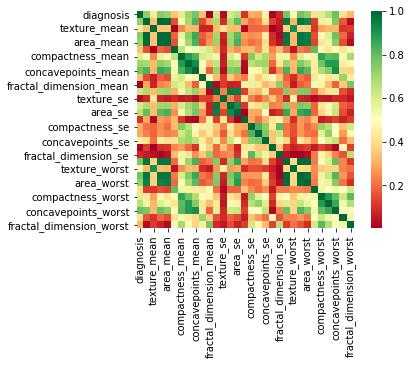

In [59]:
sns.heatmap(df.corr().abs(), square=True, cmap='RdYlGn');
print(df.corr().loc['diagnosis'].abs())

(427, 31)
(427, 16)
diagnosis              1.000000
radius_mean            0.732088
perimeter_mean         0.744596
area_mean              0.716835
compactness_mean       0.590129
concavity_mean         0.710124
concavepoints_mean     0.775007
radius_se              0.629747
perimeter_se           0.616376
area_se                0.662673
radius_worst           0.772208
perimeter_worst        0.778292
area_worst             0.732549
compactness_worst      0.593855
concavity_worst        0.661436
concavepoints_worst    0.789898
Name: diagnosis, dtype: float64


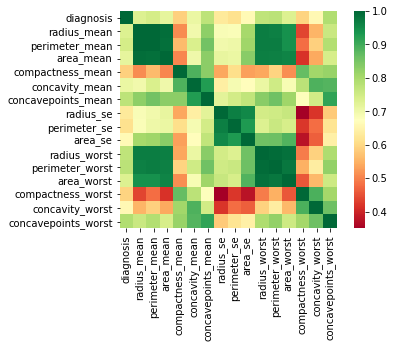

In [55]:
data = df.loc[:,((df.corr().loc['diagnosis'].abs() >= 0.5)).values]
print(df.shape)
print(data.shape)
sns.heatmap(data.corr(), square=True, cmap='RdYlGn');
print(data.corr().loc['diagnosis'])

In [61]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['diagnosis'])
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=12345)

In [62]:
from sklearn.preprocessing import StandardScaler

# Instanziieren Sie ein Objekt StandardScaler()
stdScaler = StandardScaler()

# Berechnen Sie die Standardisierungsparameter auf dem Trainingsset (!) X_train mit Hilfe der Funktion "fit()"
stdScaler.fit(X_train)
# Wenden Sie die **selbe** Standardisierung mit Hilfe der Methode transform() auf die Trainings- und Testdaten an
X_train = stdScaler.transform(X_train)
X_test = stdScaler.transform(X_test)
X_full = np.concatenate((X_train,X_test))

In [66]:
# Import des Objekts MLPClassifier aus dem Modul neural_network im Paket sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


mlp_model = MLPClassifier()
# Neuronale Netze haben immer viele Hyperparameter. Hier soll nur eine kleine Auswahl untersucht werden
param_grid_mlp = [
    {
        'hidden_layer_sizes': [(100, 50), (100, 100, 50), (100, 100, 100, 50)],
        'alpha': np.logspace(-5, 1, 7),
        'activation': ['tanh', 'relu'],
        'early_stopping': [True, False],
        'learning_rate': ['adaptive'],
    }    
]

# Gittersuche aufsetzen
mlp_model = GridSearchCV(mlp_model,param_grid_mlp,cv=15,verbose=10,n_jobs=-1)
# Gittersuche durchführen
mlp_model.fit(X_train,y_train)

Fitting 15 folds for each of 140 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0454s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0813s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 195 tasks      | elapsed:   10.9s
[Parallel(n_j

GridSearchCV(cv=15, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
             iid='deprecated', n_jobs=-1,
             param_grid=[{'activation': ['tanh', 'relu'],
                          'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                          'early_stopping': [True, False],
                       

In [69]:
# Ausgabe der besten gefundenen Hyperparameter
print(mlp_model.best_params_)

# Berechnen Sie den Trainings- und Testscore in Prozent
train_score_mlp = mlp_model.score(X_train,y_train)
test_score_mlp = mlp_model.score(X_test,y_test)

# Ausgabe der Performance
print("MLPClassifier: Training R^2 = {:.2f} Test R^2 = {:.2f}".format(train_score_mlp, test_score_mlp))


{'activation': 'relu', 'alpha': 1.0, 'early_stopping': False, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive'}
MLPClassifier: Training R^2 = 0.96 Test R^2 = 0.94
